In [1]:
import numpy as np
import pandas as pd

# Questão 01

## Resolver matriz triangular

In [2]:
def resolve_tri_inf(m):
  N = len(m)
  x = np.zeros(N, dtype=np.float128)

  for i in reversed(range(0,N)):
    x[i] = (m[i,-1:] - (m[i,i+1:-1] * x[i+1:]).sum()) / m[i,i]

  return x

## Eliminação de Gauss

In [3]:
def eliminacao(m, N):
  for i in range(0, N):
    p = m[i][i]
    for j in range(i+1, N):
      mlt = -1 * (m[j][i] / p)
      m[j] = mlt * m[i] + m[j]
  
  return resolve_tri_inf(m), N-1

## Eliminação com pivoteamento parcial

In [4]:
def eliminacao_p(m, N):
  for i in range(0, N):
    p_i = np.argmax(np.abs(m[i:,i])) + i
    m[[i, p_i]] = m[[p_i, i]]
    p = m[i][i]

    # Se p for zero, o que está abaixo do pivô já está zerado
    if p != 0:
      for j in range(i+1, N):
        mlt = -1 * (m[j][i] / p)
        m[j] = mlt * m[i] + m[j]
    
  return resolve_tri_inf(m), N-1

## Teste de convergência

In [5]:
def eh_diagonal_dominante(m,N):
  for i in range(0,N):
    if np.abs(m[i][i]) < np.abs(np.delete(m[i,:N], i)).sum():
      return False
  return True

def criterio_das_linhas(m, N):
  a = []
  for i in range(0,N):
    a.append( (np.abs(np.delete(m[i], i)) / np.abs(m[i][i])).sum() )
    
  return 0 <= max(a) <= 1

def converge(m, N):
  return eh_diagonal_dominante(m,N) or criterio_das_linhas(m, N)

## Método de Jacobi

In [6]:
def jacobi(m, b, e = 10**-4, maxit = 10**5):
  N = len(m)
  D = m.diagonal()
  m = m - np.diagflat(D)
  x = np.zeros(N, dtype=np.float128)
  x_k = np.zeros(N, dtype=np.float128)

  for i in range(0, maxit):
    x_k = (b - np.dot(m, x)) / D

    if (np.abs(x_k - x).max() <= e):
      break
    
    x = x_k

  return x_k, i

## Método de Gauss-Seidel

In [7]:
def gauss_seidel(m, b, e = 10**-4, maxit = 10**5):
  N = len(m)
  D = m.diagonal()
  m = m - np.diagflat(D)
  x = np.zeros(N, dtype=np.float128)
  x_k = np.zeros(N, dtype=np.float128)

  for i in range(0, maxit):
    x_copy = x.copy()

    for j in range(0, N):
      x_k[j] = (b[j] - (m[j] * x).sum()) / D[j]
      x[j] = x_k[j]

    if (np.abs(x_k - x_copy).max() <= e):
      break
    
    x = x_k

  return x_k, i

# Questão 02: Comparar as soluções para os métodos implementados acima

In [8]:
matrizes = [
    np.array([
      [10,1,1,12],
      [1,10,1,12],
      [1,1,10,12]
    ], dtype=np.float128),
    np.array([
      [4,-1,0,0,1],
      [-1,4,-1,0,1],
      [0,-1,4,-1,1],
      [0,0,-1,4,1]
    ], dtype=np.float128),
    np.array([
      [10,1,-1,10],
      [2,10,8,20],
      [7,1,10,30]
    ], dtype=np.float128),
    np.array([
      [5,1,1,5],
      [3,4,1,6],
      [3,3,6,0]
    ], dtype=np.float128)
  ]

eliminacao_sol = {}
eliminacao_it = {}
jacobi_sol = {}
jacobi_it = {}
gauss_seidel_sol = {}
gauss_seidel_it = {}

for i in range(0, len(matrizes)):
  m = matrizes[i]
  
  vals, nit = eliminacao_p(m.copy(), len(m))

  eliminacao_sol[f'{i}º sistema'] = vals
  eliminacao_it[f'{i}º sistema'] = nit
  
  if converge(m, len(m)):
    vals, nit = jacobi(m.copy()[:,:-1], m.copy()[:,-1:].flatten())
    jacobi_sol[f'{i}º sistema'] = vals
    jacobi_it[f'{i}º sistema'] =  nit

    vals, nit = gauss_seidel(m.copy()[:,:-1], m.copy()[:,-1:].flatten())
    gauss_seidel_sol[f'{i}º sistema'] = vals
    gauss_seidel_it[f'{i}º sistema'] = nit
  else:
    print('O sistema não tem garantias de convergência.')

In [9]:
res_vals = {
  'eliminação': eliminacao_sol,
  'jacobi': jacobi_sol,
  'gauss-seidel': gauss_seidel_sol
}

res_its = {
  'eliminação': eliminacao_it,
  'jacobi': jacobi_it,
  'gauss-seidel': gauss_seidel_it 
}

df_res = pd.DataFrame.from_dict(res_vals)
df_its = pd.DataFrame.from_dict(res_its)

### Valores encontrados

In [10]:
df_res.applymap(lambda x: np.round(x, 8))

,eliminação,jacobi,gauss-seidel
0º sistema,"[1.0, 1.0, 1.0]","[1.0000128, 1.0000128, 1.0000128]","[1.00000021, 0.9999999, 0.99999999]"
1º sistema,"[0.36363636, 0.45454545, 0.45454545, 0.36363636]","[0.36360073, 0.4544878, 0.4544878, 0.36360073]","[0.36362858, 0.45454036, 0.45454339, 0.36363585]"
2º sistema,"[1.2109375, 0.0390625, 2.1484375]","[1.21093869, 0.03909297, 2.14844817]","[1.21093949, 0.03907669, 2.14843469]"
3º sistema,"[1.0, 1.0, -1.0]","[0.99998241, 0.99997006, -1.00003313]","[1.00000731, 0.99999772, -1.00000252]"


### Passos de cada métodos

In [11]:
df_its

,eliminação,jacobi,gauss-seidel
0º sistema,2,6,4
1º sistema,3,9,6
2º sistema,2,12,8
3º sistema,2,29,6


<AxesSubplot:>

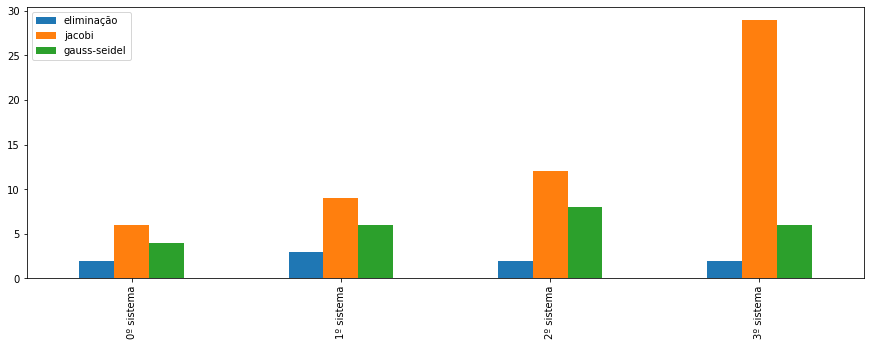

In [23]:
df_its.plot(kind='bar', figsize=(15,5))

# Questão 03

## Método da bisseção

In [12]:
def biss(f, interval, e = 10**-4, maxit = 10**5):
  a, b = interval
  
  for i in range(0, maxit):
    
    if np.abs(b - a) <= e:
      break

    m = (a + b) / 2
    
    if np.sign(f(a)) == np.sign(f(m)):
      a = m
    else:
      b = m
  
  return m, i-1

## Método da falsa posição

In [13]:
def falsa_pos(f, interval, e = 10**-4, maxit = 10**5):
  a, b = interval

  for i in range(0,maxit):
    
    if np.abs(b - a) <= e:
      break
    
    x_k = (b*f(a) - a*f(b)) / (f(a) - f(b))

    if np.sign(f(a)) == np.sign(f(x_k)):
      a = x_k
    else:
      b = x_k

  return x_k, i-1

## Método de Pégaso

In [14]:
def pegaso(f, interval, e = 10**-4, maxit = 10**2):
  a, b = interval

  for i in range(0, maxit):

    if np.abs(b - a) <= e:
      break

    c = b - ( (f(b)*(b - a)) / (f(b) - f(a)) )

    if f(a) * f(c) < 0:
      a = c
    else:
      b = c

  return c, i-1

In [36]:
res = {}
res_it = {}

funcs = [
  (lambda x: x**5 -(3*(x**4)) -(3*(x**2)) + 2, 2**(-5)),
  (lambda x: x**(1/2) -(5**(-x)), 10**(-3)),
  (lambda x: x**5 -(x**4) -(4*x) + 1, 0.01),
  (lambda x: 0.05*(x**3) -(0.4*(x**2)) + 3*x*np.sin(x), 0.005)
]

i = 0
for f, e in funcs:
  vals_its = list(biss(f, (0,1), e)) + list(falsa_pos(f, (0,1), e)) + list(pegaso(f, (0,1), e))
  res[f'função {i}'] = vals_its[::2]
  res_it[f'função {i}'] = vals_its[1::2]
  i = i+1

df_res = pd.DataFrame.from_dict(res, orient='index', columns=['bisseção', 'falsa-posição', 'pegaso'])
df_res_it = pd.DataFrame.from_dict(res_it, orient='index', columns=['bisseção', 'falsa-posição', 'pegaso'])

### Raizes encontradas

In [37]:
df_res

,bisseção,falsa-posição,pegaso
função 0,0.718750,0.696864,0.696864
função 1,0.336914,0.337471,0.337471
função 2,0.242188,0.249270,0.249275
função 3,0.003906,-0.000000,0.000000


### Número de passos

In [38]:
df_res_it

,bisseção,falsa-posição,pegaso
função 0,4,99998,98
função 1,9,99998,50
função 2,6,1,7
função 3,7,99998,0


#### Para visualizarmos os dados é necessário que os normalizemos devido a existência de valores discrepantes

In [42]:
df_res_it_std = (df_res_it - df_res_it.mean()) / df_res_it.std()
df_res_it_std

,bisseção,falsa-posição,pegaso
função 0,-1.200961,0.5,1.308959
função 1,1.200961,0.5,0.248537
função 2,-0.240192,-1.5,-0.701426
função 3,0.240192,0.5,-0.856071


<AxesSubplot:>

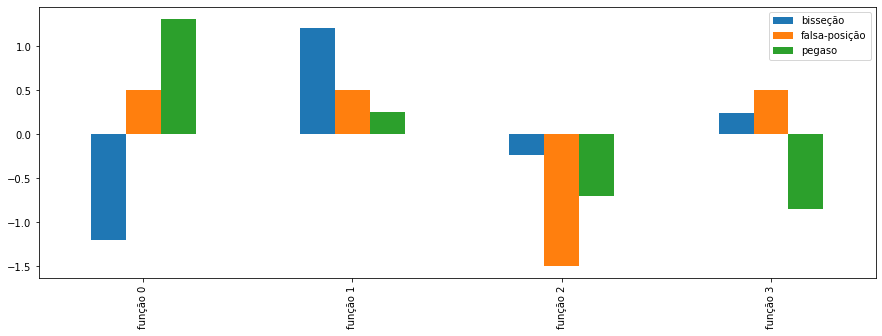

In [43]:
df_res_it_std.plot(kind='bar', figsize=(15,5))